# Confusion Matrix

In [96]:
#general use and reading in the data
import os
import numpy as np
import pandas as pd

#transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

#splitting data
from sklearn.model_selection import train_test_split

#GridSearchCV
from sklearn.model_selection import GridSearchCV

#Cross_val_score
from sklearn.model_selection import cross_val_score

#Viz
import matplotlib.pyplot as plt
import seaborn as sns

#model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## 1. Reading in the data
## 2. Features and target selection

In [9]:
pwd = os.getcwd()
data = os.path.join(pwd, "data.csv")
df = pd.read_csv(data)
#sanity check:
#df.head()

features = df[["Pclass", "Sex", "Fare"]]
target = df[["Survived"]]

## 3. Transformer

In [8]:
ct = ColumnTransformer(
    [("onehot", OneHotEncoder(sparse=False), ["Pclass", "Sex"]),
    ("scaling", StandardScaler(),["Fare"])
])

features_fit_trans = ct.fit_transform(features)
# #sanity check:
# features_fit_trans

## 4. Splitting data

In [14]:
X_trainval, X_test, y_trainval, y_test = train_test_split(features_fit_trans, np.ravel(target), random_state=0, stratify=target)

X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, np.ravel(y_trainval), random_state=0, stratify=y_trainval)

## 5. Grid Search - SVC

In [29]:
param_grid_svc = {"C":[0.001,0.01,0.1,1,10,100],
	"gamma":[0.001,0.01,0.1,1,10,100]}

grid_search_svc = GridSearchCV(SVC(), param_grid_svc, cv=5, return_train_score=True)
grid_search_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [23]:
print(
    "\nTest set score: {:.2f}\n".format(grid_search_svc.score(X_test, y_test))
)
print(
    "Best cross-validation score: {:.2f}".format(grid_search_svc.best_score_)
)
print(
    "Best parameters: {}".format(grid_search_svc.best_params_)
)
print(
    "Best best_estimator_: {}".format(grid_search_svc.best_estimator_)
)


Test set score: 0.78

Best cross-validation score: 0.82
Best parameters: {'C': 10, 'gamma': 1}
Best best_estimator_: SVC(C=10, gamma=1)


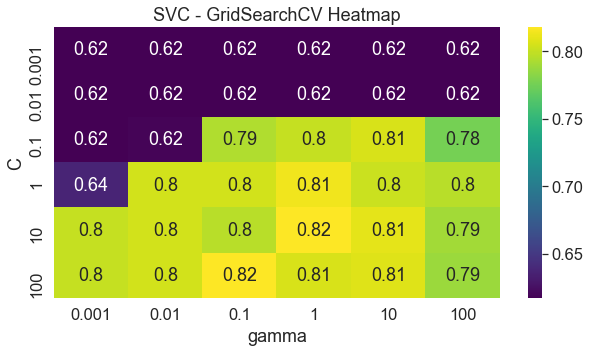

In [30]:
#showing all gridsearchcv results
results = pd.DataFrame(grid_search.cv_results_)
# #sanity check:
# display(results.head())

#reshape for plotting
scores_hm = np.array(results.mean_test_score).reshape(6,6)

#Viz figure size and font size settings
plt.figure(figsize=(10,5))
sns.set(font_scale=1.5)

#sns heatmap
#best score should not be at the edge
sns.heatmap(scores_hm, annot=True, cmap="viridis", xticklabels=param_grid["gamma"], yticklabels=param_grid["C"])
plt.xlabel("gamma")
plt.ylabel("C")
plt.title("SVC - GridSearchCV Heatmap")
plt.show()

## 5. Grid Search - KNN
- only one dimension, i.e. k-neighbour

In [57]:
param = {"n_neighbors":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

grid_search_knn = GridSearchCV(KNeighborsClassifier(),param, cv=5, return_train_score=True)
grid_search_knn.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]},
             return_train_score=True)

In [58]:
print(
    "\nTest set score: {:.2f}\n".format(grid_search_knn.score(X_test, y_test))
)
print(
    "Best parameters: {}".format(grid_search_knn.best_params_)
)
print(
    "Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_)
)
print(
    "Best best_estimator_: {}".format(grid_search_knn.best_estimator_)
)


Test set score: 0.78

Best parameters: {'n_neighbors': 8}
Best cross-validation score: 0.82
Best best_estimator_: KNeighborsClassifier(n_neighbors=8)


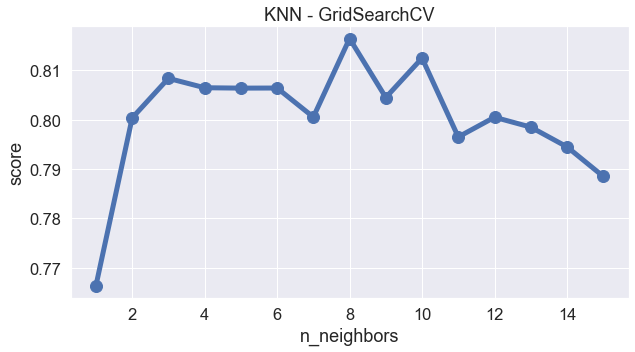

In [94]:
#showing all gridsearchcv results
results_knn = pd.DataFrame(grid_search_knn.cv_results_)
# #sanity check:
# display(results.head())

plt.figure(figsize=(10,5))
sns.set(font_scale=1.5)

plt.plot(
    results_knn["param_n_neighbors"],
    results_knn["mean_test_score"],
    linewidth=5,
    marker="o",
    markersize=12)

plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.title("KNN - GridSearchCV")
plt.show()

#for more fancy settings, go to: 
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html

## Nested CV

In [109]:
GridSearchCV_knn = GridSearchCV(KNeighborsClassifier(),param, cv=5, n_jobs=-1)

nested_knn = cross_val_score(GridSearchCV_knn, features_fit_trans,np.ravel(target), cv=5, n_jobs=-1)

nested_knn.mean()

0.7879166405122089

In [110]:
GridSearchCV_knn.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'